# Exploratory Data Analysis (EDA)
# Analyze and investigate data sets and summarize their main characteristics
1. understanding the format and contents of the DataFrame at a glance
2. understanding the structure of the DataFrame and identifying any missing data
3. drops the rows from the DataFrame df that contain missing values (NaN) and assigns the cleaned DataFrame to a new variable df_cleaned
4. provides an overview of the cleaned data, displays the summary information of the cleaned DataFrame df_cleaned, including the column names, data types, and the count of non-null values for each column
5. counts the number of tracks associated with each unique artist in the cleaned DataFrame df_cleaned and stores the counts in the artist_counts variable
6. counts the number of tracks associated with each unique album in the cleaned DataFrame df_cleaned and stores the counts in the album_counts variable
7. generates a histogram to visualize the distribution of Spotify stream numbers in the cleaned DataFrame df_cleaned
8. creates a bar plot to display the top 10 artists with the highest track counts from the artist_counts variable
9. creates a scatter plot to visualize the correlation between Spotify stream numbers and YouTube views in the cleaned DataFrame df_cleaned
10. generates a histogram to visualize the distribution of the danceability feature in the cleaned DataFrame df_cleaned

In [3]:
import pandas as pd
import pyarrow.parquet as pq

# Load the Parquet file into a DataFrame
df = pq.read_table(r"C:\Users\GOGA\Desktop\midterm.parquet").to_pandas()

In [4]:
#1 Display the first few rows of the DataFrame
print(df.head())

        Artist                                        Spotify_URL  \
0     Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1  Beach House  https://open.spotify.com/artist/56ZTgzPBDge0Ov...   
2     Al Green  https://open.spotify.com/artist/3dkbV4qihUeMsq...   
3     Al Green  https://open.spotify.com/artist/3dkbV4qihUeMsq...   
4  Beach House  https://open.spotify.com/artist/56ZTgzPBDge0Ov...   

                        Track                       Album Album_type  \
0              Feel Good Inc.                  Demon Days      Album   
1                 Silver Soul                  Teen Dream      Album   
2  I'm Still in Love with You  I'm Still in Love with You      Album   
3          Love and Happiness  I'm Still in Love with You      Album   
4                        Myth                       Bloom      Album   

                                    Uri Danceability  Energy  Key  Loudness  \
0  spotify:track:0d28khcov6AiegSCpG5TuT        0.818   0.705  6.0    -6.6

In [5]:
#2 Display the summary information of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Artist                      20718 non-null  object 
 1   Spotify_URL                 20718 non-null  object 
 2   Track                       20718 non-null  object 
 3   Album                       20718 non-null  object 
 4   Album_type                  20718 non-null  object 
 5   Uri                         20718 non-null  object 
 6   Danceability                20718 non-null  object 
 7   Energy                      20716 non-null  float64
 8   Key                         20716 non-null  float64
 9   Loudness                    20716 non-null  float64
 10  Speechiness                 20716 non-null  float64
 11  Acousticness                20716 non-null  float64
 12  Instrumentalness            20716 non-null  float64
 13  Liveness                    207

In [6]:
#3 Drop rows with missing values
df_cleaned = df.dropna()

#4 Verify the updated DataFrame
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19215 entries, 0 to 20716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Artist                      19215 non-null  object 
 1   Spotify_URL                 19215 non-null  object 
 2   Track                       19215 non-null  object 
 3   Album                       19215 non-null  object 
 4   Album_type                  19215 non-null  object 
 5   Uri                         19215 non-null  object 
 6   Danceability                19215 non-null  object 
 7   Energy                      19215 non-null  float64
 8   Key                         19215 non-null  float64
 9   Loudness                    19215 non-null  float64
 10  Speechiness                 19215 non-null  float64
 11  Acousticness                19215 non-null  float64
 12  Instrumentalness            19215 non-null  float64
 13  Liveness                    192

Gorillaz            10
bbno$               10
Niall Horan         10
42 Dugg             10
Lyanno              10
                    ..
Simone & Simaria     1
Zion & Lennox        1
The Cure             1
Hector & Tito        1
Brooks & Dunn        1
Name: Artist, Length: 2040, dtype: int64
Greatest Hits                                  28
Hamilton (Original Broadway Cast Recording)    24
Madvillainy                                    23
El Ultimo Adiós                                23
HEROES & VILLAINS                              22
                                               ..
Tum Hi Aana (From "Marjaavaan")                 1
Shri Krishna Govind Hare Murari                 1
Siyah                                           1
On Wat U On (with GloRilla)                     1
Algo Íntimo                                     1
Name: Album, Length: 11245, dtype: int64


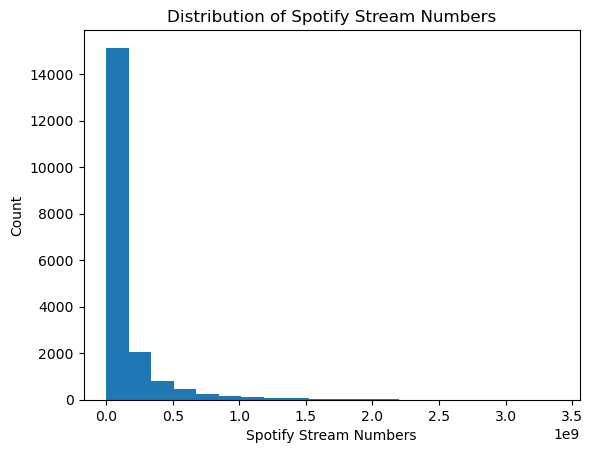

In [7]:
import matplotlib.pyplot as plt

#5 Count the number of tracks for each artist
artist_counts = df_cleaned['Artist'].value_counts()
print(artist_counts)

#6 Count the number of tracks for each album
album_counts = df_cleaned['Album'].value_counts()
print(album_counts)

#7 Explore the distribution of Spotify stream numbers
plt.hist(df_cleaned['Spotify_stream_num'], bins=20)
plt.xlabel('Spotify Stream Numbers')
plt.ylabel('Count')
plt.title('Distribution of Spotify Stream Numbers')
plt.show()

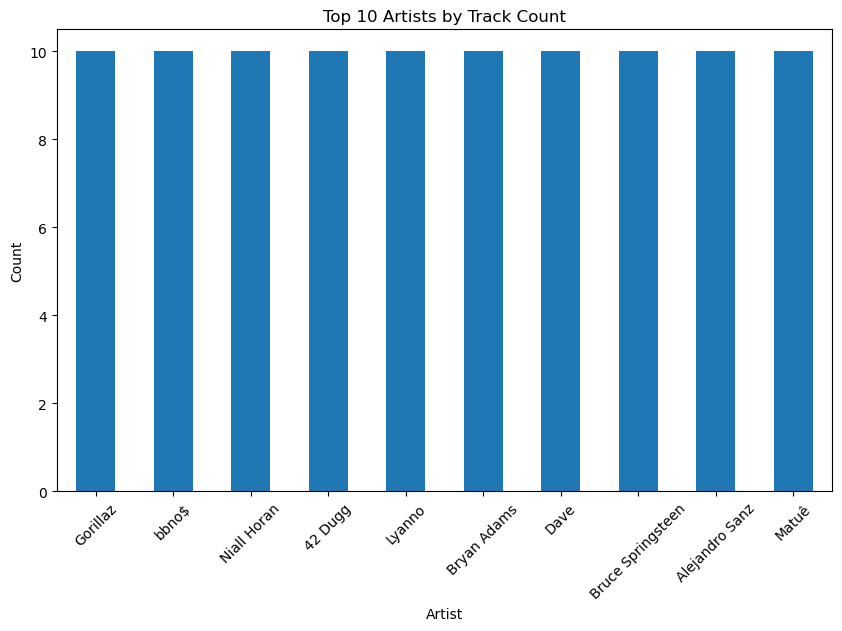

In [8]:
#8 Plot the top 10 artists by track count
top_artists = artist_counts.head(10)
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Top 10 Artists by Track Count')
plt.xticks(rotation=45)
plt.show()

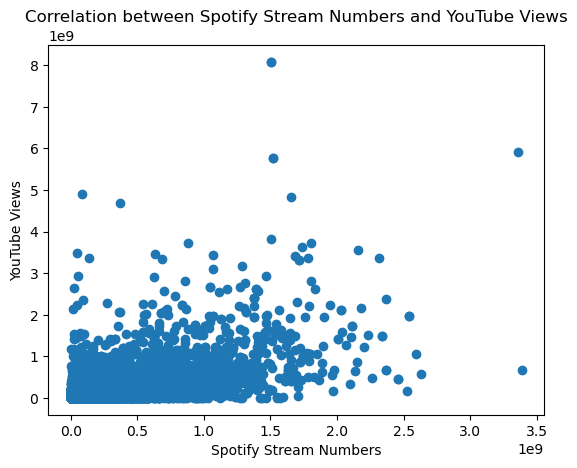

In [9]:
#9 Plot the correlation between Spotify stream numbers and YouTube views
plt.scatter(df_cleaned['Spotify_stream_num'], df_cleaned['Youtube_Views'])
plt.xlabel('Spotify Stream Numbers')
plt.ylabel('YouTube Views')
plt.title('Correlation between Spotify Stream Numbers and YouTube Views')
plt.show()

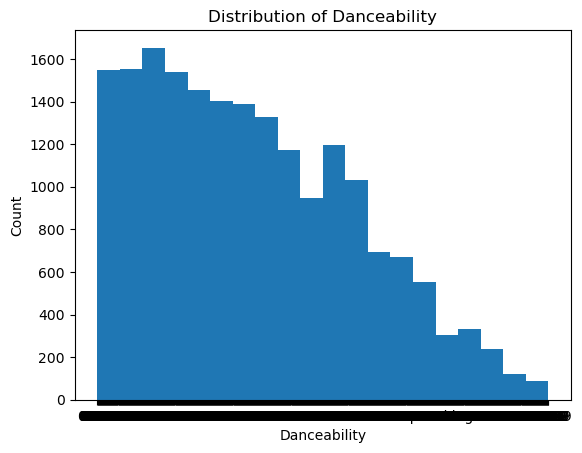

In [11]:
import matplotlib.pyplot as plt

#10 Visualize the distribution of danceability
plt.hist(df_cleaned['Danceability'], bins=20)
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title('Distribution of Danceability')
plt.show()